# Voltage Quality Estimation Model
 The quality of power supplied to end-use equipments depends upon the quality of voltage supplied by utility. Voltage is said to have quality if it has rated value at rated frequency without any distortion from sine wave. The normal voltage quality issues are:
- Voltage Sag
- Voltage Swell
- Voltage Flicker
- Voltage Harmonics
- Voltage Interruption

Estimation of voltage quality is a must for controllers to mitigate the issues using compensating device. Training data is generated by using functions which simulate the above voltage quality issues.

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the dataset into the dataframe

In [3]:
data = pd.read_csv("Regression data.csv")

In [4]:
data.head()

,Sample,Voltage,Estimate
0,1,56.46,100.0
1,2,111.20,100.0
2,3,162.57,100.0
3,4,209.00,100.0
4,5,249.09,100.0


# Total no.of rows and columns

In [5]:
data.shape

(2686, 3)

# Checking the types of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    2686 non-null   int64  
 1   Voltage   2686 non-null   float64
 2   Estimate  2686 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 63.1 KB


# Checking for duplicates

In [7]:
data.duplicated().sum()

510

# Checking for missing values

In [8]:
data.isnull().sum()

Sample      0
Voltage     0
Estimate    0
dtype: int64

# Statistical information describe

In [9]:
data.describe()

,Sample,Voltage,Estimate
count,2686.000000,2686.000000,2686.000000
mean,17.500000,0.000093,83.803797
std,9.812535,227.998073,47.441157
min,1.000000,-585.480000,1.000000
25%,9.000000,-169.132500,45.000000
50%,17.500000,0.000000,100.000000
75%,26.000000,169.092500,107.000000
max,34.000000,585.480000,180.000000


# Finding the outliers in numerical data

In [10]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [11]:
print(len(findoutliers(data.Sample))) # Number of rows having outlier

0


In [12]:
print(len(findoutliers(data.Voltage))) # Number of rows having outlier

0


# Visualising numerical data

(array([ 40.,  89., 384., 295., 535., 535., 295., 384.,  89.,  40.]),
 array([-585.48 , -468.384, -351.288, -234.192, -117.096,    0.   ,
         117.096,  234.192,  351.288,  468.384,  585.48 ]),
 <BarContainer object of 10 artists>)

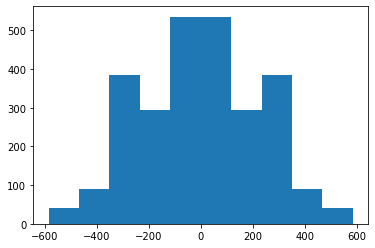

In [14]:
plt.hist(data.Voltage)

(array([ 476.,  136.,  102.,  136.,  136., 1088.,  238.,  102.,  136.,
         136.]),
 array([  1. ,  18.9,  36.8,  54.7,  72.6,  90.5, 108.4, 126.3, 144.2,
        162.1, 180. ]),
 <BarContainer object of 10 artists>)

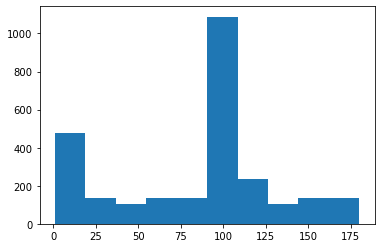

In [16]:
plt.hist(data.Estimate)

# Defining independent and dependent

In [17]:
X = data.iloc[:,:-1]
y = data.Estimate

# Spliting the data into training and testing data

In [20]:
x_train, x_test, y_train, y_test = train_test_split( X, y, train_size = 0.6, random_state = 23)

# Linear Regression

In [21]:
model_lr = LinearRegression()

# Training the model

In [22]:
model_lr.fit(x_train,y_train)

LinearRegression()

# Testing the model

In [23]:
y_predict_lr = model_lr.predict(x_test)

In [24]:
mean_squared_error(y_test,y_predict_lr)

2268.864265998344

In [25]:
r2_lr = r2_score(y_test,y_predict_lr)
r2_lr

-0.002334970956371585

In [26]:
mae_lr = mean_absolute_percentage_error(y_test,y_predict_lr)
mae_lr

4.206754913064562

# Ridge Regression

In [27]:
model_rr = Ridge()

# Training the model

In [28]:
model_rr.fit(x_train,y_train)

Ridge()

# Testing the model

In [29]:
y_predict_rr = model_rr.predict(x_test)

In [30]:
mean_squared_error(y_test,y_predict_rr)

2268.864224433382

In [31]:
r2_rr = r2_score(y_test,y_predict_rr)
r2_rr

-0.0023349525938738402

In [32]:
mae_rr = mean_absolute_percentage_error(y_test,y_predict_rr)
mae_rr

4.206754855291621

# Lasso Regression

In [33]:
model_ll = Lasso()

# Training the model

In [34]:
model_ll.fit(x_train,y_train)

Lasso()

# Testing the model

In [35]:
y_predict_ll = model_ll.predict(x_test)

In [36]:
mean_squared_error(y_test,y_predict_ll)

2268.282491897323

In [37]:
r2_ll = r2_score(y_test,y_predict_ll)
r2_ll

-0.0020779557900663104

In [38]:
mae_ll = mean_absolute_percentage_error(y_test,y_predict_ll)
mae_ll

4.205916250045867

# SVM

In [39]:
model_sv = SVR(kernel='rbf')

# Training the model

In [40]:
model_sv.fit(x_train,y_train)

SVR()

# Testing the model

In [41]:
y_predict_sv = model_sv.predict(x_test)

In [42]:
mean_squared_error(y_test,y_predict_sv)

1012.1325883075668

In [43]:
r2_sv = r2_score(y_test,y_predict_sv)
r2_sv

0.5528617979891077

In [44]:
mae_sv = mean_absolute_percentage_error(y_test,y_predict_sv)
mae_sv

1.6590088624901693

# Decision Tree

In [45]:
model_dt = DecisionTreeRegressor()

# Training the model

In [46]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [47]:
y_predict_dt = model_dt.predict(x_test)

In [48]:
mean_squared_error(y_test,y_predict_dt)

27.834883720930232

In [49]:
r2_dt = r2_score(y_test,y_predict_dt)
r2_dt

0.9877031527253058

In [50]:
mae_dt = mean_absolute_percentage_error(y_test,y_predict_dt)
mae_dt

0.06356220573501774

# Random Forest

In [51]:
model_rf = RandomForestRegressor()

# Training the model

In [52]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

# Testing the model

In [53]:
y_predict_rf = model_rf.predict(x_test)

In [54]:
mean_squared_error(y_test,y_predict_rf)

17.379236209302327

In [55]:
r2_rf = r2_score(y_test,y_predict_rf)
r2_rf

0.9923222307820914

In [56]:
mae_rf = mean_absolute_percentage_error(y_test, y_predict_rf)
mae_rf

0.057738086315154445

# Model Evaluation

In [57]:
Mean_Absolute_Percentage_Error = [mae_lr,mae_rr,mae_ll,mae_sv,mae_dt,mae_rf]
R2_Score = [r2_lr,r2_rr,r2_ll,r2_sv,r2_dt,r2_rf]
Models = ['Linear Regression', ' Ridge Regression' , ' Lasso Regression', 'Support Vector Machine',
          'Decision Tree', 'Random Forest']

# Mean Absolute Percentage Error Comparison Chart

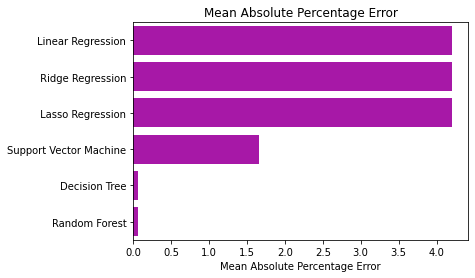

In [58]:
sn.barplot(Mean_Absolute_Percentage_Error, Models, color="m")
plt.xlabel('Mean Absolute Percentage Error')
plt.title('Mean Absolute Percentage Error')
plt.show()

# R2 Score Comparison Chart

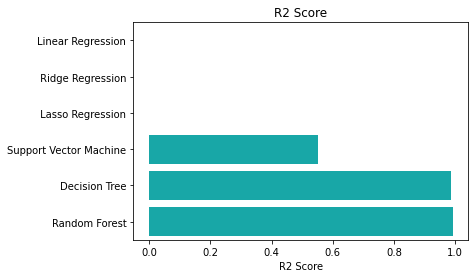

In [59]:
sn.barplot(R2_Score, Models, color="c")
plt.xlabel('R2 Score')
plt.title('R2 Score')
plt.show()

From the charts it can be seen that the Mean Absolute Percentage Error is lowest for Random Forest and the R2 Score is highest for random forest. Therefore, we can conclude that random forest is the best algorithm for this data. 

# Hyperparameter Tuning (using grid search)

In [118]:
parameters = {'max_depth':[15,20,25,30,35,10],
              'random_state': [0,1],
              'n_estimators':[100,110,120,130,150,160,170,180,190,200,300,400,500]}

grid = GridSearchCV(model_rf,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=20, n_estimators=115,
                                             random_state=1),
             param_grid={'max_depth': [15, 20, 25, 30, 35, 10],
                         'n_estimators': [100, 110, 120, 130, 150, 160, 170,
                                          180, 190, 200, 300, 400, 500],
                         'random_state': [0, 1]},
             verbose=1)

In [119]:
grid.best_score_

0.17628158461216661

In [120]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 130, 'random_state': 0}

# Training Random Forest with best parameters

In [150]:
model_rf = RandomForestRegressor(n_estimators=130,max_depth=20,random_state=1)
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=130, random_state=1)

# Testing Random Forest with best parameters

In [151]:
y_predict_rf = model_rf.predict(x_test)

In [152]:
r2_score(y_test,y_predict_rf)

0.9930171733749535

In [153]:
mean_absolute_percentage_error(y_test, y_predict_rf)

0.05536098265847415